# Discussion 7: Decision Tree and Tree Ensembles



### What are Decision Trees?

A decision tree is a flowchart-like structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes)

![alt_text](simple_decision_tree.png)

The above example is a good example of what a simple decision tree might look like. They can get a lot more complex if given the opportunity

Model accuracy: 100.00%


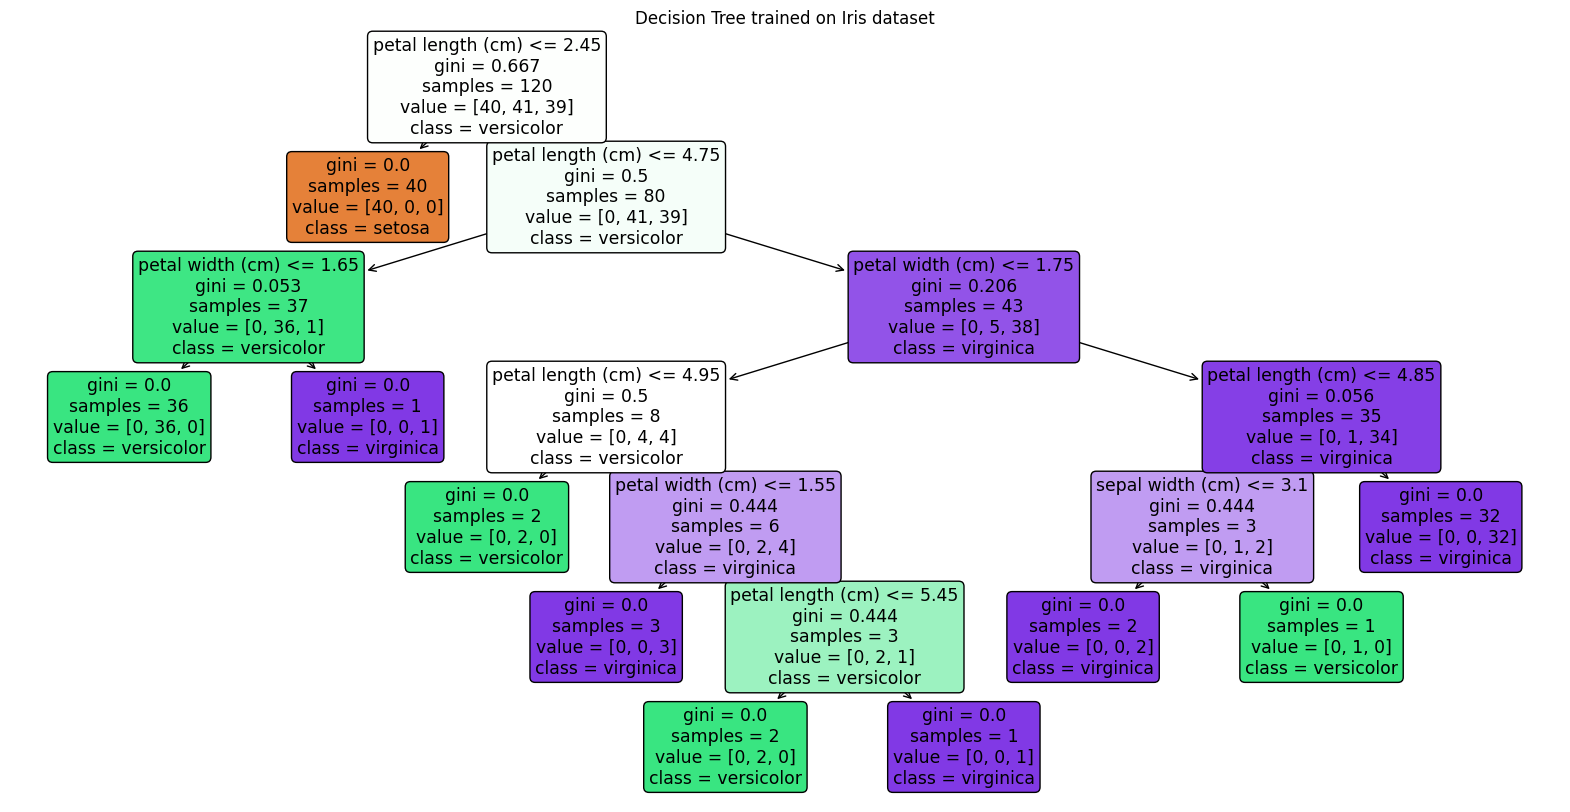

In [4]:
# Decision tree example
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

# Visualize the Decision Tree using matplotlib
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree trained on Iris dataset")
plt.show()

Limitations of using just a single decision tree:

1. Overfitting: If too many branches are allowed to occur, then the tree can just memorize the entire dataset, and become extremely overfitted.
2. High variance: Small changes in the data can lead to different splits, making the model very sensitive and unstable to data variance.
3. Single tree cannot learn complex patterns in real data.

#### Disadvantages of using just a single decision tree

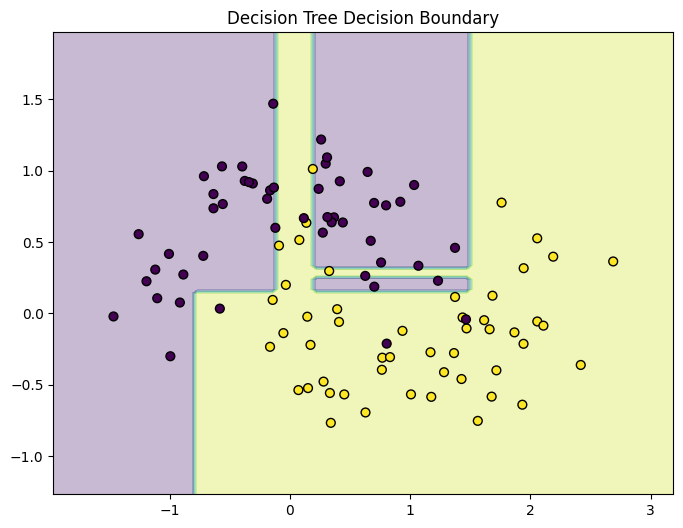

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

# Split into training and test set to demonstrate overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 3: Plot Decision Boundary
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_title("Decision Tree Decision Boundary")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_boundary(clf, X, y, ax)
plt.show()


### Solution: use multiple trees at the same time, Tree Ensembles!

Tree ensembles combine multiple decision trees to improve predictive performance and overcome the limitations of single decision trees. The main idea is to use the strength of multiple trees to make a more accurate and robust prediction.

Types of tree ensembles:

1. Random Forests: Builds multiple decision trees and merges them together to get a mroe accurate and stable prediction.
2. Gradient Boosting: Produces a prediction model in the form of an ensemble of weak prediction models (decision trees)

### Random Forests: 
Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [10]:
# Random Forests

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest Classifier
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = random_forest_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model accuracy: {accuracy*100:.2f}%")


Random Forest Model accuracy: 100.00%


Here is the advantage of using random forests:

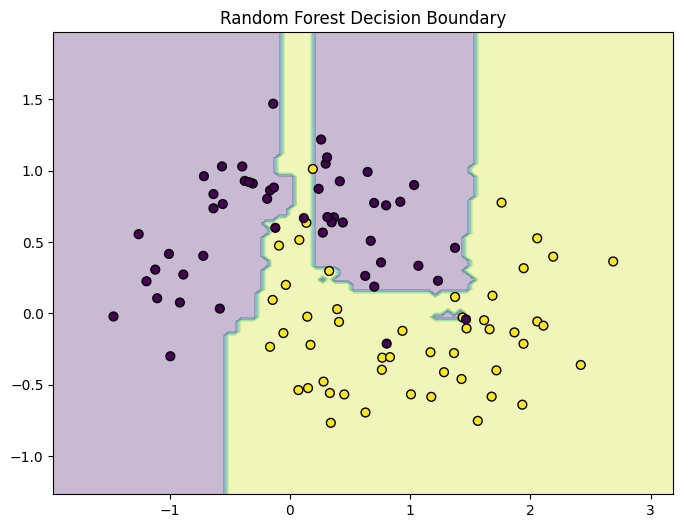

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, ax, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_title(title)

# Plotting decision boundary
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_boundary(random_forest, X, y, ax, "Random Forest Decision Boundary")
plt.show()


As we can see from the above graph, the random forest decision boundary has a lot more depth and details compared to the normal one. It is because there are more complex parameters and equations that can form complex boundaries to create better divisions

#### Slightly better approach than just random forests, Gradient boosting

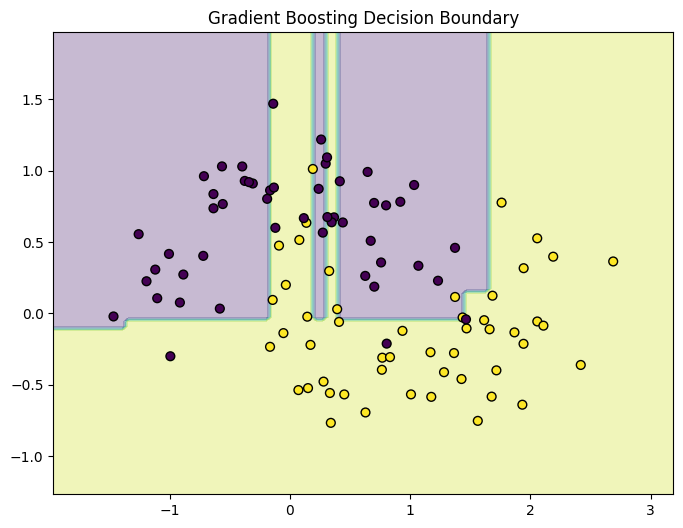

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Generate synthetic data
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, ax, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    ax.set_title(title)

# Plotting decision boundary
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_boundary(gb_clf, X, y, ax, "Gradient Boosting Decision Boundary")
plt.show()


Many other variations exist of the gradient boosting technique that work on better implementing or changing learning metrics between consecutive trees.

Some techniques to consider are:

1. AdaBoost (Adaptive Boosting): focuses on reweighting misclassified instances to improve model performance.
2. XGBoost (Extreme Gradient Boosting): optimizes for speed and performance by employing a more regularized model formalization to control over-fitting.
3. LightGBM (Light Gradient Boosting Machine): differentiates itself by using a histogram-based algorithm that allows for faster training and lower memory usage, primarily through gradient-based one-sided sampling and exclusive feature bundling.
4. CatBoost (Categorical Boosting): excels in handling categorical features without the need for extensive preprocessing, using a symmetric tree structure that reduces prediction time and model overfitting.


Scikit-learn (sklearn) directly includes an implementation of AdaBoost through the ensemble.AdaBoostClassifier and ensemble.AdaBoostRegressor classes. However, for XGBoost, LightGBM, and CatBoost, there are no native implementations within sklearn itself. These algorithms are provided through external libraries developed by their respective communities:

XGBoost: Available via the xgboost package, which provides a scikit-learn compatible API (e.g., XGBClassifier and XGBRegressor
).
LightGBM: Offered through the lightgbm package, it also has a scikit-learn compatible interface (e.g., LGBMClassifier and LGBMRegresso
r).
CatBoost: Provided by the catboost library, which includes classes like CatBoostClassifier and CatBoostRegressor, designed to work seamlessly with scikit-learn workflows.

## Token Embeddings

When dealing with natural language data, it's crucial to convert text into a numerical format that machine learning algorithms can understand. Two popular methods for this purpose are $\textbf{Count Vectorizer}$ and $\textbf{Term Frequency-Inverse Document Frequency (TF-IDF)}$.

Count Vectorizer is a method that converts a collection of text documents into a matrix of token counts. It involves the following steps:

1. Tokenization: Splitting text into individual words or tokens.
2. Vocabulary Building: Creating a vocabulary of all the unique tokens in the text corpus.
3. Encoding: For each document, count the occurrences of each token in the vocabulary and create a vector with these count values.

The result is a sparse matrix where rows represent documents, and columns represent tokens from the vocabulary. The values in this matrix are the counts of each token in each document.

Term Frequency-Inverse Document Frequency (TF-IDF) goes a step further by evaluating the importance of a word in a document relative to a collection of documents. It consists of two components:

1. Term Frequency (TF): Similar to Count Vectorizer, it measures the frequency of a word in a document.
2. Inverse Document Frequency (IDF): This measures the importance of the word across a set of documents. Words that occur frequently in many documents will have a lower IDF score, indicating they are less important.

The TF-IDF score is the product of TF and IDF scores, providing a weight to each word in each document. Words with higher TF-IDF scores are considered more important.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "the sky is blue",
    "the sun is bright",
    "the sun in the sky is bright",
    "we can see the shining sun, the bright sun"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert to array and display
print(vectorizer.get_feature_names_out())
print(X.toarray())


['blue' 'bright' 'can' 'in' 'is' 'see' 'shining' 'sky' 'sun' 'the' 'we']
[[1 0 0 0 1 0 0 1 0 1 0]
 [0 1 0 0 1 0 0 0 1 1 0]
 [0 1 0 1 1 0 0 1 1 2 0]
 [0 1 1 0 0 1 1 0 2 2 1]]


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents (same as above)
documents = [
    "the sky is blue",
    "the sun is bright",
    "the sun in the sky is bright",
    "we can see the shining sun, the bright sun"
]

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = tfidf_vectorizer.fit_transform(documents)

# Convert to array and display
print(tfidf_vectorizer.get_feature_names_out())
print(X.toarray())


['blue' 'bright' 'can' 'in' 'is' 'see' 'shining' 'sky' 'sun' 'the' 'we']
[[0.65919112 0.         0.         0.         0.42075315 0.
  0.         0.51971385 0.         0.34399327 0.        ]
 [0.         0.52210862 0.         0.         0.52210862 0.
  0.         0.         0.52210862 0.42685801 0.        ]
 [0.         0.3218464  0.         0.50423458 0.3218464  0.
  0.         0.39754433 0.3218464  0.52626104 0.        ]
 [0.         0.23910199 0.37459947 0.         0.         0.37459947
  0.37459947 0.         0.47820398 0.39096309 0.37459947]]
